## Dataset Information

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: 
<li>air_conditioner
<li>car_horn
<li>children_playing
<li>dog_bark
<li>drilling
<li>engine_idling
<li>gun_shot
<li>jackhammer
<li>siren
<li>street_music

## Fetching dataset from kaggle via api

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/ # copy kaggle json file to directory
! chmod 600 ~/.kaggle/ kaggle.json # permission for the json to act 
print('done')
# ! kaggle datasets list # 
!kaggle datasets download -d chrisfilo/urbansound8k

mkdir: cannot create directory ‘/root/.kaggle’: File exists
done
100% 5.61G/5.61G [03:02<00:00, 26.2MB/s]
100% 5.61G/5.61G [03:02<00:00, 33.0MB/s]


In [ ]:
!unzip '/content/urbansound8k.zip'

In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline
from IPython.display import Audio
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
librosa.__version__

'0.8.1'

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/UrbanSound8K.csv')
df.sample(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
2677,159745-8-1-5.wav,159745,4.199906,8.199906,2,9,8,siren
6855,57320-0-0-10.wav,57320,5.000000,9.000000,2,1,0,air_conditioner
6247,36429-2-0-14.wav,36429,7.000000,11.000000,2,8,2,children_playing
7142,62837-7-1-35.wav,62837,279.206708,283.206708,1,3,7,jackhammer
5956,28808-1-0-4.wav,28808,2.000000,6.000000,1,10,1,car_horn
3289,167702-4-4-0.wav,167702,28.065751,30.492081,1,8,4,drilling
3759,176714-2-0-51.wav,176714,25.500000,29.500000,1,1,2,children_playing
5570,21683-9-0-18.wav,21683,19.598564,23.598564,1,7,9,street_music
1882,146709-0-0-44.wav,146709,22.000000,26.000000,1,4,0,air_conditioner
3766,176787-5-0-0.wav,176787,0.000000,4.000000,1,1,5,engine_idling


In [ ]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
ipd.Audio('/content/fold1/101415-3-0-2.wav')

In [ ]:
filename= '/content/fold1/101415-3-0-2.wav'

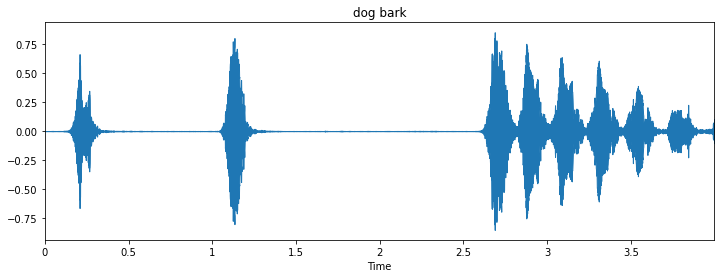

In [ ]:
plt.figure(figsize=(12,4))
plt.title('dog bark')
data,sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

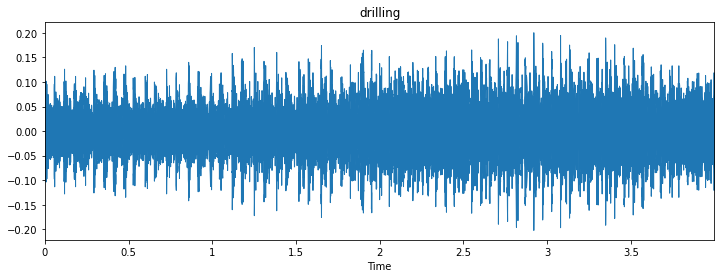

In [ ]:
plt.figure(figsize=(12,4))
plt.title('drilling')
data,sample_rate = librosa.load('/content/fold1/103074-7-4-1.wav')
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio('/content/fold1/103074-7-4-1.wav')

In [ ]:
print(data)

[ 0.01857918  0.014416    0.01109376 ... -0.00435836 -0.0004809
  0.01177187]


In [ ]:
pd.__version__

'1.3.5'

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
metadata['class'].value_counts()


dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
metadata.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [ ]:
sample_rate

22050

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename) 

In [ ]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

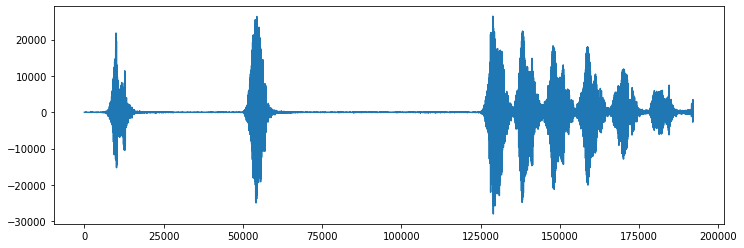

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

##Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs

array([[-5.21320618e+02, -5.19244873e+02, -5.18639771e+02, ...,
        -4.35682465e+02, -3.92686127e+02, -3.53734650e+02],
       [ 1.43376465e+01,  1.71779118e+01,  1.81039009e+01, ...,
         1.13759216e+02,  1.51305222e+02,  1.78508270e+02],
       [ 1.35261917e+01,  1.61207390e+01,  1.72592888e+01, ...,
         6.42746277e+01,  6.28374176e+01,  5.72559586e+01],
       ...,
       [ 3.53906393e-01, -3.32358456e+00, -4.83565140e+00, ...,
        -5.26991272e+00, -1.14964163e+00, -2.76052785e+00],
       [ 4.51929927e-01, -3.06704044e+00, -4.64729738e+00, ...,
        -3.42241073e+00,  2.55063629e+00,  2.86859894e+00],
       [ 4.35776591e-01, -2.79775834e+00, -4.41259766e+00, ...,
        -2.67133570e+00,  1.37135601e+00, -4.06251371e-01]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/fold1'
metadata=pd.read_csv('/content/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

8732it [14:48,  9.83it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)


,feature,class
0,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",dog_bark
1,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",children_playing
2,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",children_playing
3,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",children_playing
4,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",children_playing
5,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",children_playing
6,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",children_playing
7,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",children_playing
8,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",children_playing
9,"[-403.7324, 94.0706, 18.064863, -11.812853, -7...",car_horn


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print('x_train shape:',X_train.shape,'\nx_test shape:',X_test.shape)

x_train shape: (6985, 40) 
x_test shape: (1747, 40)


In [ ]:
print('y_train shape:',y_train.shape,'\ny_test shape:',y_test.shape)

y_train shape: (6985, 10) 
y_test shape: (1747, 10)


## Model creation

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]
print(num_labels)

10


In [ ]:
from tensorflow.keras import models,layers
# from Sequential.keras import layers

In [43]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

In [ ]:
num_epochs = 1000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)

In [ ]:
start = datetime.now()

In [ ]:



model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
202/219 [==========================>...] - ETA: 0s - loss: 2.2557 - accuracy: 0.1185
Epoch 1: val_loss improved from inf to 2.26994, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1170 - val_loss: 2.2699 - val_accuracy: 0.1048
Epoch 2/1000
212/219 [============================>.] - ETA: 0s - loss: 2.2563 - accuracy: 0.1167
Epoch 2: val_loss improved from 2.26994 to 2.26983, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1170 - val_loss: 2.2698 - val_accuracy: 0.1042
Epoch 3/1000
203/219 [==========================>...] - ETA: 0s - loss: 2.2572 - accuracy: 0.1150
Epoch 3: val_loss improved from 2.26983 to 2.26979, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.2561 - accuracy: 0.1135 - val_loss: 2.2698 - val_accuracy: 0.1

KeyboardInterrupt: ignored

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.10417859256267548
